# Майнор Интеллектуальный анализ данных / Введение в анализ данных

## Домашнее задание 3. Логистическая регрессия и случайный лес.

В этом задании вам предстоит:
- поработать с логистической регрессией (полная реализация не потребуется, однако можно заработать бонусные баллы)
- воспроизвести подход случайного леса через одно решающее дерево, поэкспериментировать со случайным лесом.

На все вопросы требуется отвечать развёрнуто, аппелируя к полученным значениям или графикам, ответы вписывать в отдельную ячейку, выбрав для неё тип "Markdown". От полноты и качества ответов будет во многом зависеть ваша итоговая оценка.

Задание выполняется самостоятельно, плагиат будет стандартно наказываться лишением всех баллов за задание.
- Максимальная оценка за задание: 10 баллов.
- Дата выдачи: 28.04.2018
- Срок сдачи: 23:59 18.05.2018

In [46]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Часть 0. Подготовка данных.

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [3]:
train = pd.read_csv('train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['price_range'] = train['price_range'].map({0:0, 1:0, 2:1, 3:1})
target = train['price_range']
train = train.drop('price_range', 1)

Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.7, random_state=7)

## Часть 1. Логистическая регрессия.

[4 балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?

Не забывайте, что метод `predict_proba` вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import sklearn.linear_model as lm
LR = lm.LogisticRegression()
LR.fit(X_train_scaled, y_train)
y_pred_proba = LR.predict_proba(X_test_scaled)
y_pred_proba = y_pred_proba[:,1]

y_pred_acc = LR.predict(X_test_scaled)
for i in range(len(y_pred_proba)):
    if y_pred_proba[i]>0.5: y_pred_acc[i]=1
    else: y_pred_acc[i]=0

import sklearn.metrics as m
roc_auc = m.roc_auc_score(y_test, y_pred_proba)
accuracy = m.accuracy_score(y_test, y_pred_acc)
print('AUC-ROC', roc_auc, '\nAccuracy', accuracy)

AUC-ROC 0.998312189786 
Accuracy 0.973571428571


Целевую переменную удаётся предсказывать хорошо.

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

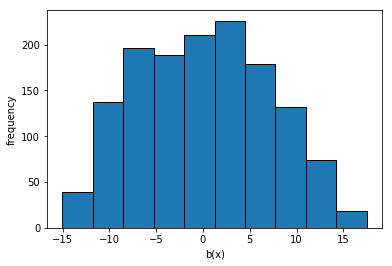

Значения b(x) лежат в интервале [ -15.0207191561 ,  17.5088463635 ]


In [16]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
b = []
for i in range(X_test_scaled.shape[0]):
    b.append(*np.dot(LR.coef_, X_test_scaled[i]) + LR.intercept_)

plt.hist(b, edgecolor = 'black')
plt.xlabel('b(x)')
plt.ylabel('frequency')
plt.show()
print('Значения b(x) лежат в интервале [', min(b),', ', max(b), ']')

Предсказание принимает значения примерно от -15 до 17.5. Эти значения похожи на вероятности классов.

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

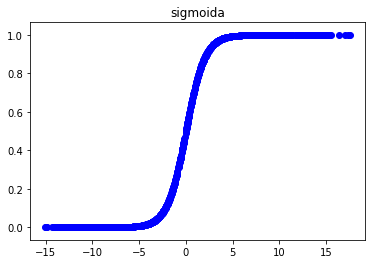

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def sigmoid(X):
    p = []
    for x in X:
        p.append(1/(1+math.exp(-x)))
    return p

y = sigmoid(b)
plt.scatter(b, y, color = 'blue')
plt.title('sigmoida')
plt.show()

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [75]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(y - y_pred_proba)

[ 0.  0.  0. ...,  0.  0.  0.]


Сигмоида возрастает. Значения совпали с полученными с помощью predict_proba.

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

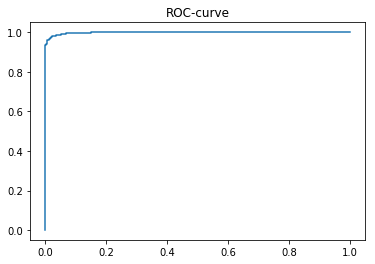

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fpr, tpr, threshold = m.roc_curve(y_test, y_pred_proba)
roc_auc = m.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.show()

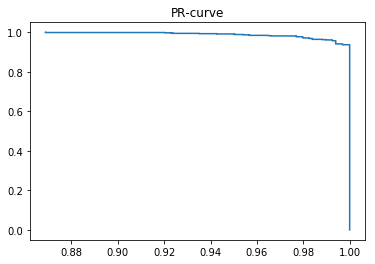

In [23]:
pr, rec, thresholds = m.precision_recall_curve(y_test, y_pred_proba) 
plt.plot(pr, rec)
plt.title('PR-curve')
plt.show()

### Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В `loss_history` необходимо сохранять вычисленное на каждой итерации значение функции потерь. 

In [ ]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        pass
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

1. Примените логистическую регресиию на той же выборке.
2. Посчитайте качество по тем же метрикам.
3. Визуализируйте изменение значений функции потерь от номера итераций.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 2. Случайные леса.

[6 баллов]

Случайный лес — алгоритм машинного обучения, представляющий собой бэггинг над решающими деревьями (усреднение ответов множества слабых алгоритмов) с 2 основными идеями:
- Использование подмножества признаков при построении каждого сплита дерева.
- Бутстрап обучающей выборки для построения каждого дерева (с повторениями).

В этом задании мы попробуем оценить пользу каждой из идей. Будем использовать ту же выборку с тем же разбиением на 2 части. Для начала обучите решающее дерево `DecisionTreeClassifier` из scikit-learn и посчитайте ROC-AUC и Accuracy (порог 0.5). Не забудьте зафикиксировать сид для построения дерева (несмотря на то, что в классической реализации никакой случайности нет, при большой глубине дерева может возникать неоднозначность в выборке признака в сплите). Используйте этот сид для всех заданий ниже.

In [36]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.tree import DecisionTreeClassifier
rs = 7

DTC = DecisionTreeClassifier(random_state = rs)
DTC.fit(X_train, y_train)

y_pred_proba = DTC.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

y_pred_acc = DTC.predict(X_test)
for i in range(len(y_pred_proba)):
    if y_pred_proba[i]>0.5: y_pred_acc[i]=1
    else: y_pred_acc[i]=0

roc_auc = m.roc_auc_score(y_test, y_pred_proba)
accuracy = m.accuracy_score(y_test, y_pred_acc)
print('AUC-ROC', roc_auc, '\nAccuracy', accuracy)

AUC-ROC 0.935059103971 
Accuracy 0.935


### 2.1 Бэггинг классификаторов

Реализуйте бэггинг над решающими деревьями (усреднение предсказанных вероятностей всего ансамбля). 
В качестве основы используйте всё тот же `DecisionTreeClassifier`. Количество базовых алгоритмов предлагается брать равным 100. 

Посчитайте качество с помощью тех же метрик. Ответьте на следующие вопросы:
- Что интересного вы видите?
- С чем это связано?

In [37]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.ensemble import BaggingClassifier

BC = BaggingClassifier(base_estimator = DTC, n_estimators = 100, random_state = rs)
BC.fit(X_train, y_train)
y_pred_proba = BC.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

y_pred_acc = DTC.predict(X_test)
for i in range(len(y_pred_proba)):
    if y_pred_proba[i]>0.5: y_pred_acc[i]=1
    else: y_pred_acc[i]=0

roc_auc = m.roc_auc_score(y_test, y_pred_proba)
accuracy = m.accuracy_score(y_test, y_pred_acc)
print('AUC-ROC', roc_auc, '\nAccuracy', accuracy)

AUC-ROC 0.992571185998 
Accuracy 0.965714285714


Качество улучшилось как по метрике AUC-ROC, так и по Accuracy по сравнению с DescisionTree без бэггинга. Это говорит о том, что усреднение большого числа переобученных моделей приводит к лучшему результату по сравнению с одной моделью.

### 2.2 Сэмплирование обучающей выборки

Добавим к нашему бэггингу бутстрап выборки (генерация случайной выборки того же размера с возвращением). Для этого может пригодиться `numpy.random.randint`.

Посчитайте качество. Что вы видите?

In [38]:
np.random.seed(123)  # для одинакового бутстрапа в каждом запуске

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_bootstrap = []
y_train_bootstrap = []
for i in range(X_train.shape[0]):
    index = np.random.randint(low = 0, high = X_train.shape[0])
    X_train_bootstrap.append(X_train.iloc[index])
    y_train_bootstrap.append(y_train.iloc[index])
    
BC = BaggingClassifier(base_estimator = DTC, n_estimators = 100, random_state = rs)
BC.fit(X_train_bootstrap, y_train_bootstrap)
y_pred_proba = BC.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

y_pred_acc = BC.predict(X_test)
for i in range(len(y_pred_proba)):
    if y_pred_proba[i]>0.5: y_pred_acc[i]=1
    else: y_pred_acc[i]=0

roc_auc = m.roc_auc_score(y_test, y_pred_proba)
accuracy = m.accuracy_score(y_test, y_pred_acc)
print('AUC-ROC', roc_auc, '\nAccuracy', accuracy)

AUC-ROC 0.990260906479 
Accuracy 0.949285714286


Качество предсказания немного снизилось, т.к. при бутстрапе различные объекты составляют только около 2/3 от первоначальной выборки (и, соответственно, часть объектов повторяется, что также влияет на веса).

### 2.3 Выбор случайного подмножества признаков

Временно забудем о бутстрапе выборки и добавим выбор случайного подмножества признаков при построении каждого сплита. В `DecisionTreeClassifier` за это отвечает параметр `max_features`. По умолчанию он имеет значение `None`, что обозначает использование всех возможных признаков. Для задачи классификации рекоменуется использовать квадратный корень от количества признаков. Попробуйте выставить такое значение. На этот раз надо отключить фиксированный сид в построении дерева, так как иначе каждый раз мы будем выбирать одинаковые подмножества признаков. 

Посчитайте качество. Что вы видите?

In [39]:
np.random.seed(123)  # для воспроизводимости построения случайных подмножеств признаков

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
DTC = DecisionTreeClassifier(max_features = int(math.sqrt(X_train.shape[1])))
BC = BaggingClassifier(base_estimator = DTC, n_estimators = 100)
BC.fit(X_train, y_train)
y_pred_proba = BC.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

y_pred_acc = BC.predict(X_test)
for i in range(len(y_pred_proba)):
    if y_pred_proba[i]>0.5: y_pred_acc[i]=1
    else: y_pred_acc[i]=0

roc_auc = m.roc_auc_score(y_test, y_pred_proba)
accuracy = m.accuracy_score(y_test, y_pred_acc)
print('AUC-ROC', roc_auc, '\nAccuracy', accuracy)

AUC-ROC 0.990407850052 
Accuracy 0.944285714286


Качество незначительно хуже по сравнению с использованием бутстрапа без выбора случайного подмножества признаков (2.1), однако лучше, чем при бутстрапе с сэмплированием (2.2).

### 2.4 = 2.2 + 2.3

Объединим два подхода (бутстрап + выбор подмножества признаков). Получим случайный лес.

Посчитайте качество. Что вы видите?

In [40]:
np.random.seed(123)  # для одинакового бутстрапа и выбора подмножеств признаков в каждом запуске

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_bootstrap = []
y_train_bootstrap = []
for i in range(X_train.shape[0]):
    index = np.random.randint(low = 0, high = X_train.shape[0])
    X_train_bootstrap.append(X_train.iloc[index])
    y_train_bootstrap.append(y_train.iloc[index])

DTC = DecisionTreeClassifier(max_features = int(math.sqrt(X_train.shape[1])))
BC = BaggingClassifier(base_estimator = DTC, n_estimators = 100)

BC.fit(X_train_bootstrap, y_train_bootstrap)
y_pred_proba = BC.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

y_pred_acc = BC.predict(X_test)
for i in range(len(y_pred_proba)):
    if y_pred_proba[i]>0.5: y_pred_acc[i]=1
    else: y_pred_acc[i]=0

roc_auc = m.roc_auc_score(y_test, y_pred_proba)
accuracy = m.accuracy_score(y_test, y_pred_acc)
print('AUC-ROC', roc_auc, '\nAccuracy', accuracy)

AUC-ROC 0.986714872322 
Accuracy 0.935714285714


Качество стало хуже, чем при использовании отдельно бутстрапа или выбора подмножеств признаков (только Accuracy немного выше, чем в бутстрапе). Вероятно, это связано с тем, что оба метода сами по себе давали худшее качество, чем просто при бэггинге, поэтому вместе они сделали ухудшили качество ещё больше.

То, что мы сделали уже реализовано в `RandomForestClassifier`. Попробуйте воспользоваться им. Количество используемых деревьев передаётся в параметре `n_estimators`.

Посчитайте качество. Что вы видите?

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, random_state = rs)
RFC.fit(X_train, y_train)

y_pred_proba = RFC.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

y_pred_acc = RFC.predict(X_test)
for i in range(len(y_pred_proba)):
    if y_pred_proba[i]>0.5: y_pred_acc[i]=1
    else: y_pred_acc[i]=0
        
roc_auc = m.roc_auc_score(y_test, y_pred_proba)
accuracy = m.accuracy_score(y_test, y_pred_acc)
print('AUC-ROC', roc_auc, '\nAccuracy', accuracy)

AUC-ROC 0.990583365987 
Accuracy 0.944285714286


Качество стало немного лучше, чем в аналогичном методе, реализованном вручную в 2.4 (возможно, в RandomForestClassifier лучше подбираются какие-то параметры, например, max_features). С другой стороны, качество осталось ниже, чем в 2.1.

### 2.5 Влияние количества используемых деревьев в случайном лесе

Один из параметров случайного леса — количество деревьев, используемых в бэггинге. Оценим, как влияет этот параметр на финальное качество. Для этого обучите случайные леса с разным количество деревьев (например, перебирайте от 10 до 1000 с шагом в 10), оцените качество с помощью ROC-AUC. Постройте график зависимости ROC-AUC от количества используемых деревьев. Что вы видите?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
roc_auc_list = []
n = []

for j in range(10, 1000, 10):
    RFC = RandomForestClassifier(n_estimators = j, random_state = rs)
    RFC.fit(X_train, y_train)

    y_pred_proba = RFC.predict_proba(X_test)
    y_pred_proba = y_pred_proba[:,1]

    roc_auc = m.roc_auc_score(y_test, y_pred_proba)
    roc_auc_list.append(roc_auc)
    n.append(j)
    
plt.plot(n, roc_auc_list)
plt.xlabel('Number of trees')
plt.ylabel('ROC-AUC score')
plt.show()

Качество резко растёт увеличении малого количества деревьев, но начиная примерно с 80 деревьев увеличение их количества незначительно влияет на качество предсказания.

### 2.6 Важность признаков

Случайный лес позволяет оценить важность признаков. У обученного случайного леса есть аттрибут `feature_importances_`, где храниться важность для каждого признака. Постройте `barplot` с важностью признаков (удобно использовать библиотеку `seaborn`, где можно для каждого столбца передать название признака `train.columns`).

In [33]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import seaborn as sns

RFC = RandomForestClassifier(n_estimators = 100, random_state = rs)
RFC.fit(X_train, y_train)

ax = sns.barplot(y = RFC.feature_importances_, x = train.columns)
sns.set(rc={'figure.figsize':(500,100)})
sns.set(font_scale = 8)

## Выводы

Напишите, что интересного вы узнали в этой работе, в каких экспериментах какие результаты получились.

- Иногда самый сложный метод - не самый лучший (например, здесь - бэггинг и RandomForestClassifier).
- Усреднение большого количества переобученных моделей даёт очень высокое качество.
- Как видно из графика, наибольшее влияние на цену телефона оказывает количество оперативной памяти.